In [2]:
!pip install pandas_datareader

In [3]:
##Data Collection
import pandas_datareader as pdr


In [4]:
df = pdr.get_data_tiingo('AAPL', api_key='89a43ffeac8db84f581562c26e81a930c646fa0f')

In [5]:
df.to_csv("AAPL.csv")

In [6]:
import pandas as pd

In [7]:
df=pd.read_csv('AAPL.csv')

In [8]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-04-09 00:00:00+00:00,170.05,173.09,169.85,169.88,29017718,40.473191,41.196734,40.425590,40.432730,116070872,0.0,1.0
1,AAPL,2018-04-10 00:00:00+00:00,173.25,174.00,171.53,173.00,28614241,41.234815,41.413321,40.825442,41.175314,114456964,0.0,1.0
2,AAPL,2018-04-11 00:00:00+00:00,172.44,173.92,171.70,172.23,22431640,41.042029,41.394281,40.865904,40.992048,89726560,0.0,1.0
3,AAPL,2018-04-12 00:00:00+00:00,174.14,175.00,173.04,173.41,22889285,41.446642,41.651329,41.184834,41.272897,91557140,0.0,1.0
4,AAPL,2018-04-13 00:00:00+00:00,174.73,175.84,173.85,174.78,25124255,41.587067,41.851255,41.377620,41.598967,100497020,0.0,1.0


In [9]:
df1 = df.reset_index()['close']

In [10]:
df1.shape

(1259,)

In [11]:
import matplotlib.pyplot as plt

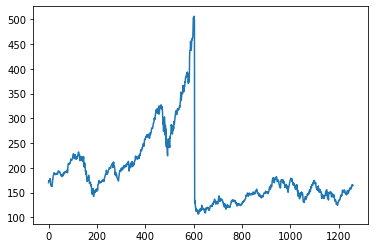

In [12]:
plt.plot(df1)

In [13]:
#apply minmax scaler
import numpy as np

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
df1.shape

(1259, 1)

In [17]:
#splitting in train and test

In [18]:
training_size = int(len(df1)*0.65)
test_size= len(df1) - training_size
train_data, test_data= df1[0:training_size, :1], df1[training_size:len(df1), :1]

In [19]:
df1[0:training_size, :1]

array([[1.58321853e-01],
       [1.66336882e-01],
       [1.64308078e-01],
       [1.68566061e-01],
       [1.70043832e-01],
       [1.72773951e-01],
       [1.78835316e-01],
       [1.77833438e-01],
       [1.65209768e-01],
       [1.47476518e-01],
       [1.46274264e-01],
       [1.40513463e-01],
       [1.42291797e-01],
       [1.43719474e-01],
       [1.38960551e-01],
       [1.46324358e-01],
       [1.55942392e-01],
       [1.74652473e-01],
       [1.75453976e-01],
       [1.92836569e-01],
       [1.96167815e-01],
       [1.98396994e-01],
       [2.01678147e-01],
       [2.08390733e-01],
       [2.04758923e-01],
       [2.03656857e-01],
       [1.99373826e-01],
       [2.03731997e-01],
       [2.00751409e-01],
       [1.99048215e-01],
       [2.02354415e-01],
       [2.01177207e-01],
       [2.04182843e-01],
       [2.03656857e-01],
       [2.04733876e-01],
       [2.03030683e-01],
       [2.02028804e-01],
       [2.00450845e-01],
       [2.08891672e-01],
       [2.12874139e-01],


In [20]:
df1[training_size:len(df1), :1]

array([[0.09117095],
       [0.09585473],
       [0.09432686],
       [0.09718222],
       [0.1059737 ],
       [0.10429555],
       [0.09906074],
       [0.08919224],
       [0.09845961],
       [0.09658109],
       [0.10008766],
       [0.10449593],
       [0.10557295],
       [0.10001252],
       [0.09552912],
       [0.09718222],
       [0.09773325],
       [0.09688165],
       [0.10149029],
       [0.10046337],
       [0.10073889],
       [0.09843456],
       [0.09830933],
       [0.09708203],
       [0.09773325],
       [0.10532248],
       [0.10584847],
       [0.11090795],
       [0.10857858],
       [0.0989856 ],
       [0.09983719],
       [0.10356919],
       [0.10737633],
       [0.10715091],
       [0.10399499],
       [0.10194114],
       [0.10459612],
       [0.11591735],
       [0.11268629],
       [0.11438948],
       [0.11724483],
       [0.11887289],
       [0.12485911],
       [0.12090169],
       [0.11829681],
       [0.10552286],
       [0.10697558],
       [0.103

In [21]:
df1

array([[0.15832185],
       [0.16633688],
       [0.16430808],
       ...,
       [0.1472511 ],
       [0.14256731],
       [0.14482154]])

In [23]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [24]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [25]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [26]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [27]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [28]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 18s 386ms/step - loss: 0.0405 - val_loss: 0.0021
Epoch 2/100
12/12 [==============================] - 2s 205ms/step - loss: 0.0123 - val_loss: 0.0018
Epoch 3/100
12/12 [==============================] - 2s 203ms/step - loss: 0.0097 - val_loss: 4.6715e-04
Epoch 4/100
12/12 [==============================] - 3s 217ms/step - loss: 0.0084 - val_loss: 0.0017
Epoch 5/100
12/12 [==============================] - 3s 222ms/step - loss: 0.0079 - val_loss: 0.0010
Epoch 6/100
12/12 [==============================] - 3s 213ms/step - loss: 0.0072 - val_loss: 0.0013
Epoch 7/100
12/12 [==============================] - 3s 220ms/step - loss: 0.0070 - val_loss: 5.9959e-04
Epoch 8/100
12/12 [==============================] - 3s 212ms/step - loss: 0.0059 - val_loss: 4.5473e-04
Epoch 9/100
12/12 [==============================] - 3s 216ms/step - loss: 0.0061 - val_loss: 3.3514e-04
Epoch 10/100
12/12 [==============================] - 3s 213ms/step - loss

In [32]:
import tensorflow as tf

In [33]:
tf.__version__

'2.10.0'

In [34]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 43ms/step


In [35]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [38]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


227.24579050404606

In [37]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

153.43760794539006

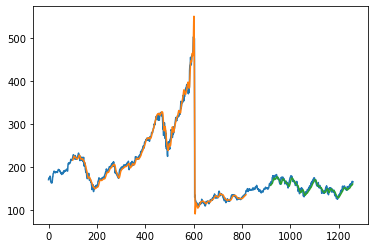

In [39]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [41]:
len(test_data)

441

In [42]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [55]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [44]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [45]:
temp_input

[0.10735128365685653,
 0.103794614902943,
 0.10820288040075132,
 0.10507201001878513,
 0.10990607388854096,
 0.11133375078271751,
 0.10311834690043825,
 0.10855353788353161,
 0.11078271759549146,
 0.10336881653099561,
 0.09362554790231681,
 0.08598622417031926,
 0.10316844082654975,
 0.10386975579211016,
 0.1026174076393237,
 0.0996618659987476,
 0.09034439574201625,
 0.08541014402003755,
 0.08969317470256727,
 0.08846587351283652,
 0.0943018159048215,
 0.096756418284283,
 0.09109580463368816,
 0.07428929242329363,
 0.06930494677520344,
 0.06394489668127734,
 0.06376956793988725,
 0.07165936130244199,
 0.0635942391984971,
 0.06266750156543521,
 0.05808390732623664,
 0.04809016906700059,
 0.05703193487789604,
 0.05783343769567939,
 0.04566061365059482,
 0.04889167188478394,
 0.045535378835316165,
 0.05705698184095176,
 0.05838447088290544,
 0.05983719474013771,
 0.06675015654351907,
 0.0665497808390732,
 0.0699311208515967,
 0.0728866624921728,
 0.07105823418910456,
 0.07120851596743893

In [46]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.13728051]
101
1 day input [0.10379461 0.10820288 0.10507201 0.10990607 0.11133375 0.10311835
 0.10855354 0.11078272 0.10336882 0.09362555 0.08598622 0.10316844
 0.10386976 0.10261741 0.09966187 0.0903444  0.08541014 0.08969317
 0.08846587 0.09430182 0.09675642 0.0910958  0.07428929 0.06930495
 0.0639449  0.06376957 0.07165936 0.06359424 0.0626675  0.05808391
 0.04809017 0.05703193 0.05783344 0.04566061 0.04889167 0.04553538
 0.05705698 0.05838447 0.05983719 0.06675016 0.06654978 0.06993112
 0.07288666 0.07105823 0.07120852 0.07772073 0.08583594 0.08939261
 0.08771446 0.09297433 0.09790858 0.09056982 0.09380088 0.09665623
 0.11015654 0.11937383 0.11243582 0.11974953 0.11291171 0.11028178
 0.11063244 0.11774577 0.11611772 0.12145272 0.11739512 0.11448967
 0.10429555 0.10537257 0.10659987 0.09986224 0.10289292 0.10161553
 0.09635567 0.09785848 0.11068253 0.11769568 0.11211021 0.11529117
 0.10958046 0.10434565 0.1092799  0.11458986 0.11559173 0.12275517
 0.12062617 0.12663745 0.13134627

In [53]:
df3=df1.tolist()
df3.extend(lst_output)
len(df1)

1259

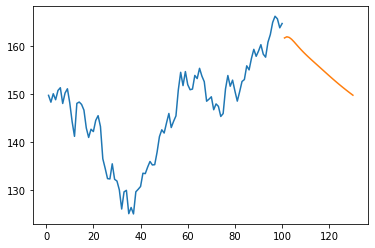

In [57]:
import matplotlib.pyplot as plt
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

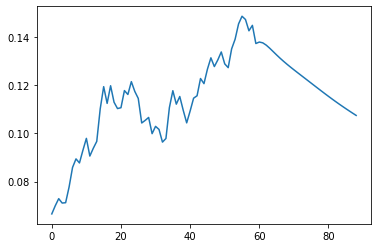

In [58]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [59]:
df3=scaler.inverse_transform(df3).tolist()


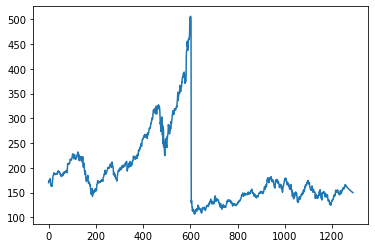

In [60]:
plt.plot(df3)